In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Backpropagation Implementaion

بناء شبكة عصبية بسيطة من الصفر
استخدام Backpropagation لتحسين أوزان الشبكة
تطبيقها على مجموعة بيانات افتراضية لتصنيف النقاط بين فئتين

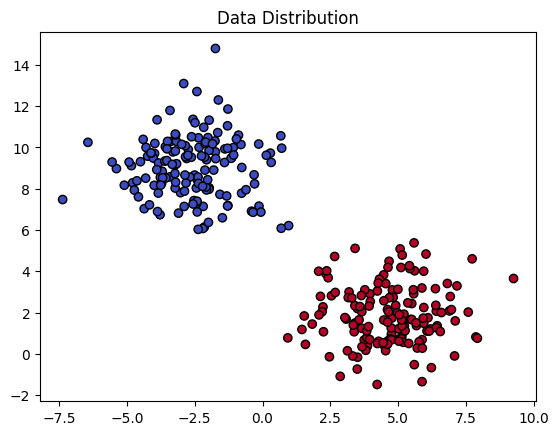

In [2]:
X,y = make_blobs(n_samples=300,centers=2,cluster_std=1.5,random_state=42)
y = y.reshape(-1,1) #make y column

#plotting the data
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',edgecolor='k')
plt.title("Data Distribution")
plt.show()

In [9]:
#Identifying the neural network
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)

In [13]:
class NeuralNetwork:
    def __init__(self, input_dim=2, hidden_dim=4, output_dim=1):
        self.W1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim)
        self.b2 = np.zeros((1, output_dim))

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, learning_rate=0.1):
        m = X.shape[0]
        self.forward(X)

        dZ2 = self.A2 - y
        dW2 = (self.A1.T @ dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * sigmoid_derivative(self.A1)  # التصحيح هنا
        dW1 = (X.T @ dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs=1000, learning_rate=0.1):
        losses = []
        for epoch in range(epochs):
            y_hat = self.forward(X)
            loss = np.mean(-(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
            losses.append(loss)
            self.backward(X, y, learning_rate)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        plt.plot(losses)
        plt.title("Training Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.show()

Epoch 0, Loss: 0.8416
Epoch 100, Loss: 0.0475
Epoch 200, Loss: 0.0220
Epoch 300, Loss: 0.0139
Epoch 400, Loss: 0.0101
Epoch 500, Loss: 0.0079
Epoch 600, Loss: 0.0065
Epoch 700, Loss: 0.0055
Epoch 800, Loss: 0.0047
Epoch 900, Loss: 0.0041


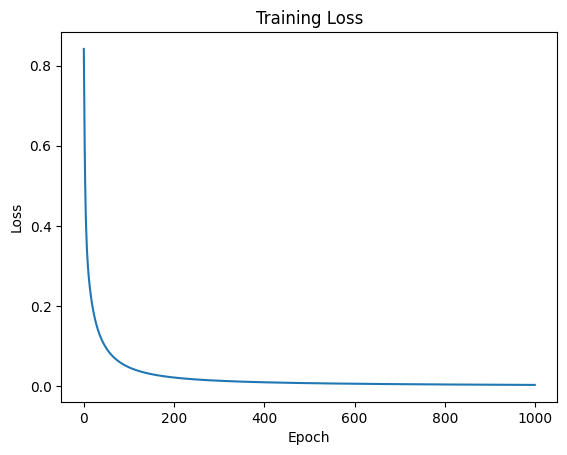

In [14]:
#training the model
nn = NeuralNetwork()
nn.train(X,y,epochs=1000,learning_rate=0.5)


In [16]:
def predict(model, X):
    y_hat = model.forward(X)
    return (y_hat > 0.5).astype(int)

# دقة النموذج
predictions = predict(nn, X)
accuracy = np.mean(predictions == y)
print(f"\nAccuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


1. إنشاء البيانات أو تحميلها
نحتاج إلى مجموعة بيانات ثنائية التصنيف (Binary Classification) تحتوي على:
مدخلات X (مثلاً: 300 نقطة ثنائية البُعد).
مخرجات y (0 أو 1).
2. تعريف الشبكة العصبية
نحدد هيكل الشبكة:
طبقة إدخال (Input Layer): عدد الميزات (features).
طبقة مخفية (Hidden Layer): عدد العقد.
طبقة إخراج (Output Layer): تصنيف ثنائي → 1 نورون.
نستخدم وظيفة التنشيط مثل sigmoid أو ReLU.
3. الانتشار للأمام (Forward Propagation)
يتم حساب الخرج من الطبقة الأولى حتى الطبقة الأخيرة باستخدام المعادلات:
Z=X⋅W+b
A=Activation(Z)
4. حساب الخطأ (Loss)
نستخدم دالة خسارة (Loss Function) مثل Cross Entropy Loss.
5. الانتشار للخلف (Backward Propagation)
نحسب المشتقات الجزئية للخطأ بالنسبة للأوزان والأبعاد.
نقوم بتحديث الأوزان باستخدام الانحدار التدريجي (Gradient Descent).
6. التكرار (Training Loop)
نعيد تنفيذ الخطوات السابقة عدة مرات (epochs) لتحديث الأوزان وتحسين النموذج.

In [18]:
#using pytorch
